# Decision Tree Model
The given dataset is from Dream Club which connects borrowers with investors. We will use lending data from 2007-2010 and build a classifier model to predict whether or not the borrower has paid back their loan in full.



Installing graphviz module for better Tree Visualization

In [163]:
conda install python-graphviz

Solving environment: ...working... done

# All requested packages already installed.


Note: you may need to restart the kernel to use updated packages.


In [164]:
#import libraries required for decision tree
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import StandardScaler #library to normalize the data using Z score
from sklearn import tree
import graphviz
import seaborn as sns
import matplotlib.pyplot as plt

In [165]:
#Load the given Dataset
df = pd.read_csv('loan_data.csv')

In [166]:
#Validate for properly loaded dataset
df.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


# Information about DataSet : MetaData

In [167]:
#Get the info from the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [168]:
#Describe the dataset for statistical disribution 
df.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


# Create a countplot using sns showing the counts of loans by purpose, with the color hue defined by not.fully.paid.

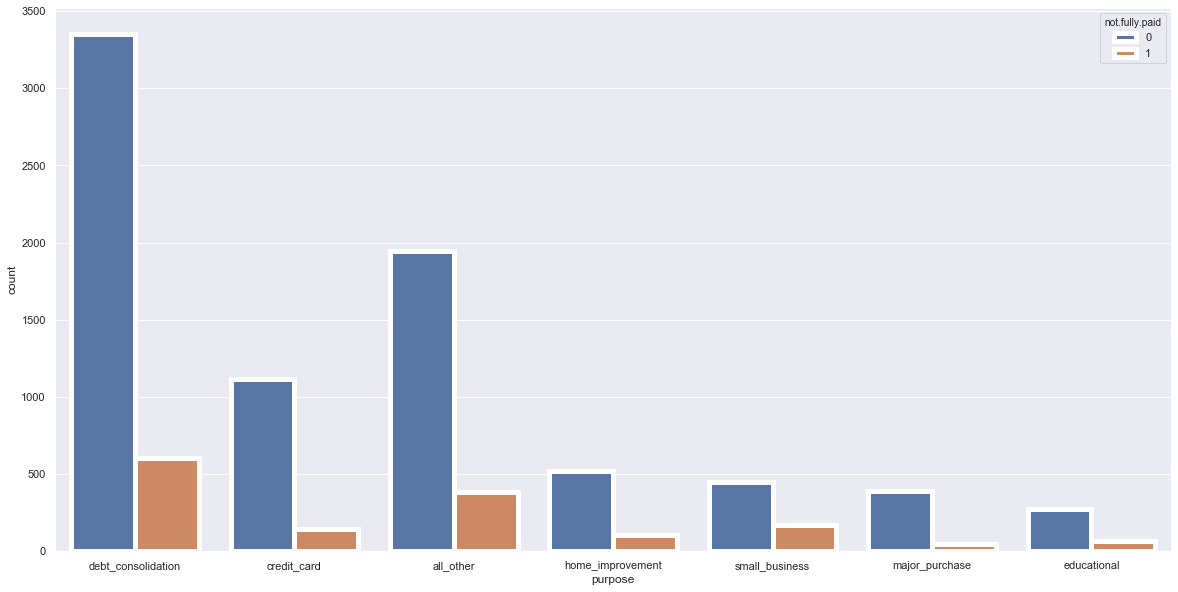

In [169]:
plt.rcParams['figure.figsize'] = (20.0, 10.0) #Set the size to plot the visual
plt.rcParams['font.family'] = "serif" #Set the font 
sns.set(style="darkgrid",palette='deep',font='sans-serif',font_scale=1,color_codes=True) #Set the styles for sns
sns.countplot(x="purpose", hue="not.fully.paid",data=df,linewidth=5) #Plot the countplot for target feature as hue

# Print a heatmap to check NULL values

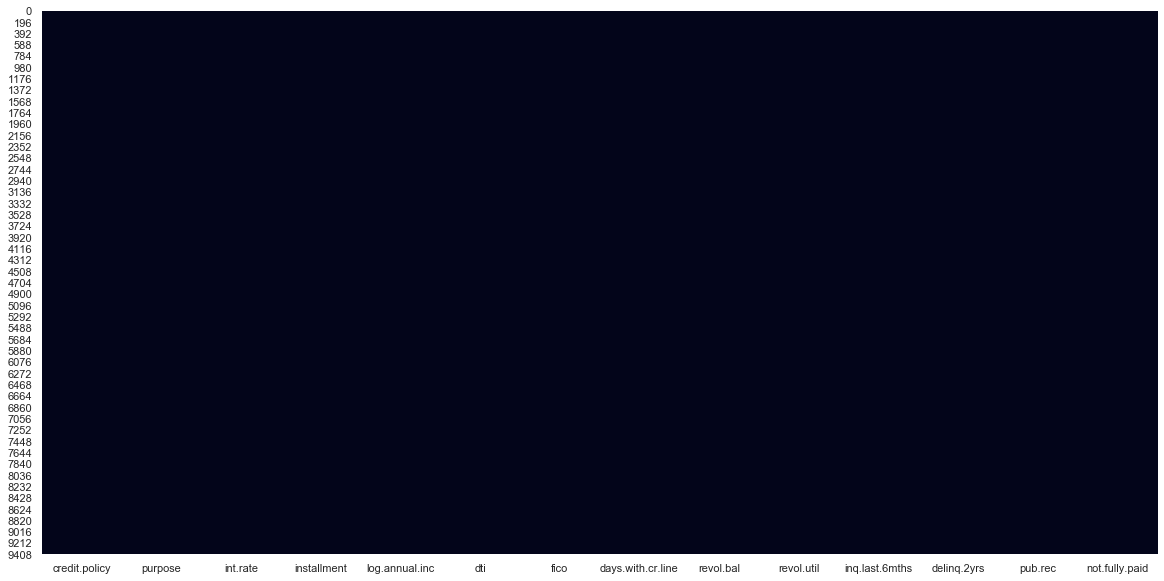

In [170]:
#Print the heatmap to check the null values 
sns.heatmap(df.isnull(), cbar=False)

Inference: No Null values found

# Data Exploration

# Correlation Check

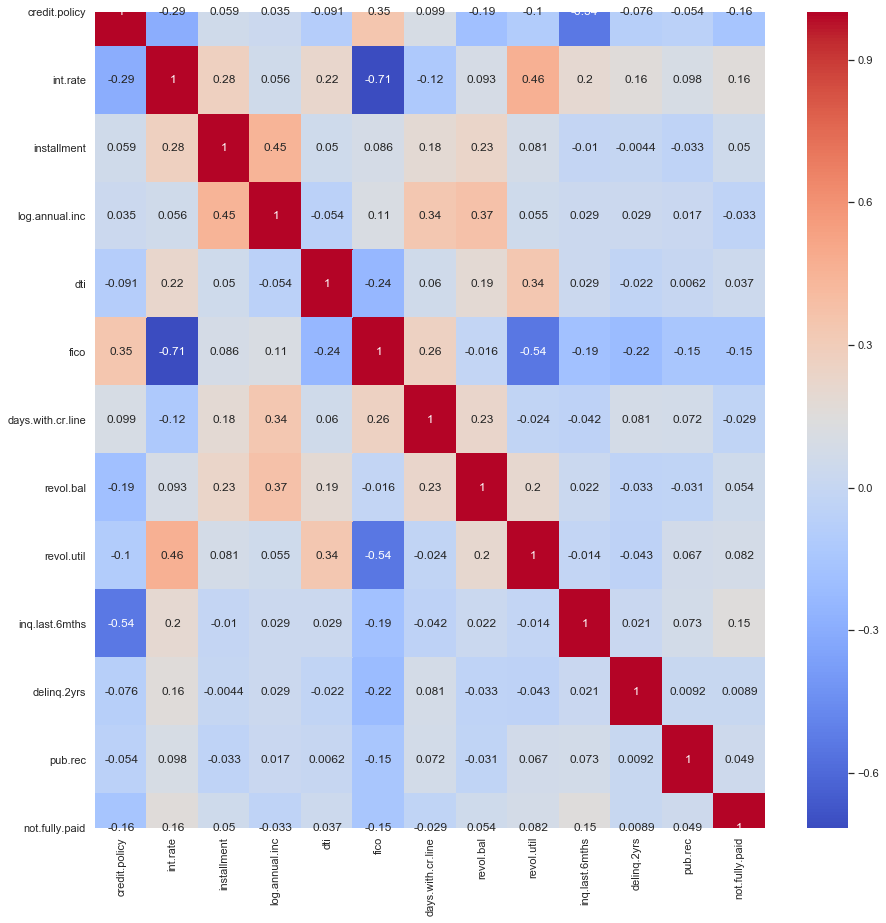

In [171]:
import seaborn as sns
#See the correlations between values

#Get the correalation matrix
corr_matrix = df.corr()

#index the correlated matrix
corr_matrix_index = corr_matrix.index

#Define the size of space to be plotted
plt.figure(figsize=(15,15))

#Draw the heat map 
sns.heatmap(df[corr_matrix_index].corr(),annot=True,cmap='coolwarm')

# Find the 0 values in the dataset¶

In [172]:
#Check the 0 values
print ("Total records in given dataset         : {0}".format(len(df)))
print ("Missing credit.policy                  : {0}".format(len(df.loc[df['credit.policy'] == 0])))
print ("Missing purpose                        : {0}".format(len(df.loc[df.purpose == 0])))
print ("Missing int.rate                       : {0}".format(len(df.loc[df['int.rate'] == 0]))) 
print ("Missing installment                    : {0}".format(len(df.loc[df.installment == 0])))
print ("Missing dti                            : {0}".format(len(df.loc[df.dti == 0])))
print ("Missing fico                           : {0}".format(len(df.loc[df.fico == 0])))
print ("Missing days.with.cr.line              : {0}".format(len(df.loc[df['days.with.cr.line'] == 0])))
print ("Missing revol.bal                      : {0}".format(len(df.loc[df['revol.bal']== 0])))
print ("Missing revol.util                     : {0}".format(len(df.loc[df['revol.util'] == 0])))
print ("Missing inq.last.6mths                 : {0}".format(len(df.loc[df['inq.last.6mths'] == 0])))
print ("Missing delinq.2yrs                    : {0}".format(len(df.loc[df['delinq.2yrs'] == 0])))
print ("Missing pub.rec                        : {0}".format(len(df.loc[df['pub.rec'] == 0])))
print ("Missing not.fully.paid                 : {0}".format(len(df.loc[df['not.fully.paid'] == 0])))


Total records in given dataset         : 9578
Missing credit.policy                  : 1868
Missing purpose                        : 0
Missing int.rate                       : 0
Missing installment                    : 0
Missing dti                            : 89
Missing fico                           : 0
Missing days.with.cr.line              : 0
Missing revol.bal                      : 321
Missing revol.util                     : 297
Missing inq.last.6mths                 : 3637
Missing delinq.2yrs                    : 8458
Missing pub.rec                        : 9019
Missing not.fully.paid                 : 8045


Inference: These are legitimate 0 values hence keeping it as is. 

# Dataset Distribution Check

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D1B3A9EEC8>,
      dtype=object)

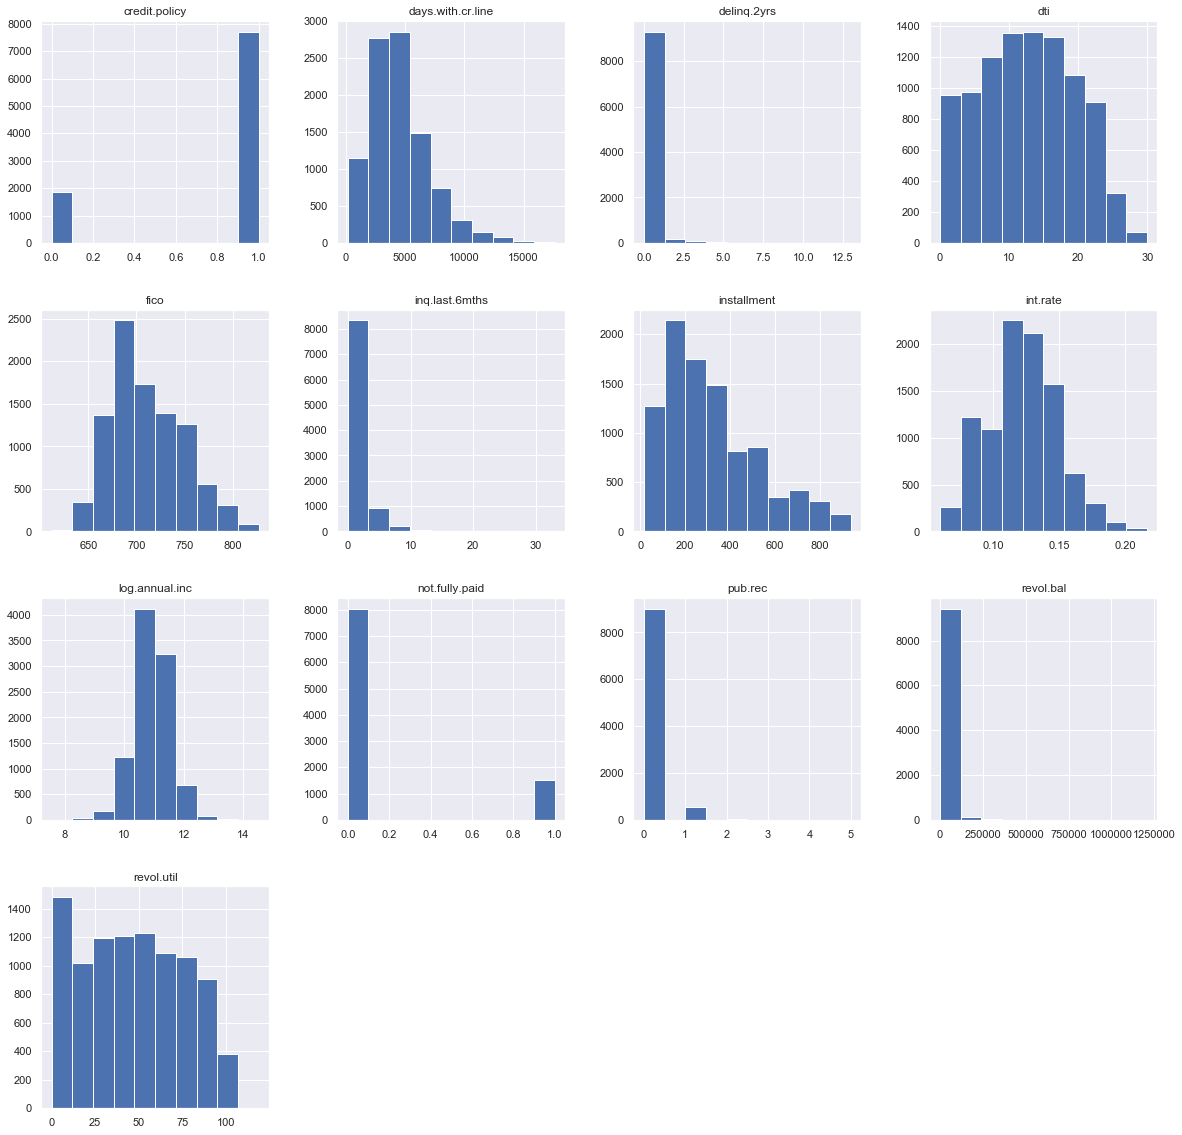

In [173]:
df.hist(figsize = (20,20))

Inference : Most of the data is normally distributed except binary dataset

In [174]:
#Check the frequency distribution of Categoricalvalue
print(df['purpose'].value_counts())

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64


In [175]:
#Total number of distinct categorical values
print(df['purpose'].value_counts().count())

7


In [176]:
#In case if you find null values (not in this case), fill the values with mode as below
#cat_df = cat_df.fillna(cat_df['purpose'].value_counts().index[0])

# Build a classifier model using Decision Tree algorithm and plot the same¶

In [177]:
#Address the Categorical feature by doing encoding , we are using One-Hot encoding technique for the endoing. 
#The basic strategy is to convert each category value into a new column and assign a 1 or 0 (True/False) value to the column. 
#This has the benefit of not weighting a value improperly.

df_encoded = pd.get_dummies(df, columns=['purpose'], prefix = ['purpose'],drop_first=True)
print(df_encoded.head())

   credit.policy  int.rate  installment  log.annual.inc    dti  fico  \
0              1    0.1189       829.10       11.350407  19.48   737   
1              1    0.1071       228.22       11.082143  14.29   707   
2              1    0.1357       366.86       10.373491  11.63   682   
3              1    0.1008       162.34       11.350407   8.10   712   
4              1    0.1426       102.92       11.299732  14.97   667   

   days.with.cr.line  revol.bal  revol.util  inq.last.6mths  delinq.2yrs  \
0        5639.958333      28854        52.1               0            0   
1        2760.000000      33623        76.7               0            0   
2        4710.000000       3511        25.6               1            0   
3        2699.958333      33667        73.2               1            0   
4        4066.000000       4740        39.5               0            1   

   pub.rec  not.fully.paid  purpose_credit_card  purpose_debt_consolidation  \
0        0               0     

In [178]:
#Lets do the scaling of the given dataset & Split the features & Labels
sc_X = StandardScaler()
X =  pd.DataFrame(sc_X.fit_transform(df_encoded.drop(["not.fully.paid"],axis = 1)),
                 columns=['credit.policy', 'int.rate', 'installment', 'log.annual.inc', 'dti',
                           'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
                           'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
                           'purpose_credit_card', 'purpose_debt_consolidation',
                           'purpose_educational', 'purpose_home_improvement',
                           'purpose_major_purchase', 'purpose_small_business'])
y = df_encoded["not.fully.paid"]


In [179]:
#Split the data into Test and Train 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42,stratify=y)

In [180]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion='gini',max_depth=3)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

In [181]:
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8387265135699373


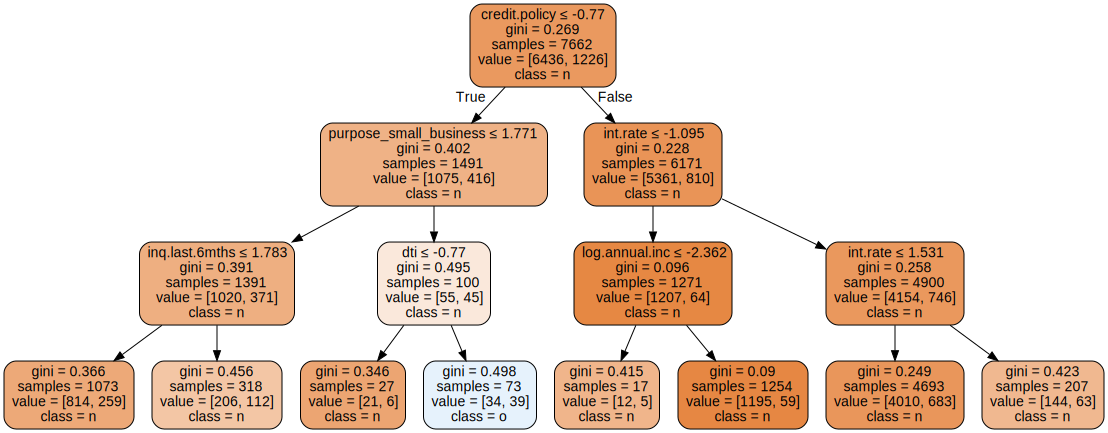

In [182]:
#Get the feature list into one list
Feature_list = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                           'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
                           'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
                            'purpose_credit_card','purpose_debt_consolidation', 'purpose_educational',
                            'purpose_home_improvement', 'purpose_major_purchase',
                            'purpose_small_business']
                        
                        
#Set the graph input object for model clf and target feature name 
dot_data = tree.export_graphviz(clf, 
                  feature_names=Feature_list,  
                  class_names="not.fully.paid",  
                  filled=True, rounded=True,  
                  special_characters=True,
                   out_file=None,
                
                               )
#Plot the graph for the model clf 
graph = graphviz.Source(dot_data)

#Print the graph
graph

# Print classification report


In [183]:
#import confusion_matrix
from sklearn.metrics import confusion_matrix

In [184]:
#Get the confusion Matrix
cm=confusion_matrix(y_test,y_pred)
cm

array([[1600,    9],
       [ 300,    7]], dtype=int64)

In [185]:
#Another option to get the confusion matrix using crosstab
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,1600,9,1609
1,300,7,307
All,1900,16,1916


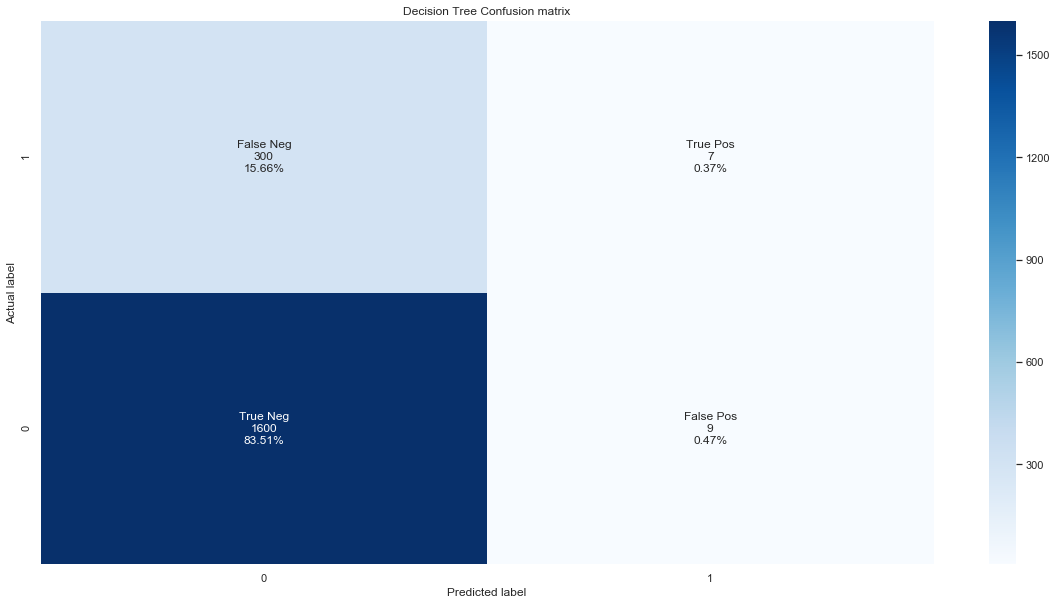

In [186]:
#Visualize the Confusion Matrix in a more descriptive way 

#Possible labels for 4 quadrent 
group_names = ['True Neg','False Pos','False Neg','True Pos']

#Assign the values from confusion matrix
group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]

#Get the percentage values 
group_percentages = ["{0:.2%}".format(value) for value in
                     cm.flatten()/np.sum(cm)]

#Group the above three information as label
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]

#Assign the shape of 2x2 for possible 4 label values
labels = np.asarray(labels).reshape(2,2)

#Set the parameters for Matplot
fig, ax = plt.subplots()

#Plot the heatmap with above labels 
sns.heatmap(cm, annot=labels,fmt='', cmap="Blues",cbar_kws={"orientation": "vertical"})

ax.xaxis.set_label_position("bottom") #Set label position for X-axis as botton
#plt.tight_layout() #Layout Setting
plt.title('Decision Tree Confusion matrix', y=1.1) #Set the title 
plt.ylabel('Actual label') #Set the Y-axis Label
plt.xlabel('Predicted label') #Set the X-axis Label

ax.set_ylim([0,2]) #Set the label alignment setting 
plt.show() #Show the Plot 


In [187]:
#import classification_report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      1609
           1       0.44      0.02      0.04       307

    accuracy                           0.84      1916
   macro avg       0.64      0.51      0.48      1916
weighted avg       0.78      0.84      0.77      1916



Inference: 
    Model is 91% accurate for 0 target feature. 
    Accuracy : 84%

# Find out the stratified cross validation accuracy.

In [188]:
#import library for stratified fold option
from sklearn.model_selection import StratifiedKFold

Split Fold : 1
TRAIN: [   0    3    4 ... 9575 9576 9577] TEST: [   1    2    7 ... 9569 9570 9573]
Accuracy: 0.8387265135699373


Split Fold : 2
TRAIN: [   0    1    2 ... 9574 9575 9576] TEST: [   9   10   12 ... 9562 9563 9577]
Accuracy: 0.8397703549060542


Split Fold : 3
TRAIN: [   0    1    2 ... 9574 9576 9577] TEST: [   3    4   11 ... 9557 9571 9575]
Accuracy: 0.8340292275574113


Split Fold : 4
TRAIN: [   1    2    3 ... 9574 9575 9577] TEST: [   0    5    6 ... 9564 9567 9576]
Accuracy: 0.8381201044386423


Split Fold : 5
TRAIN: [   0    1    2 ... 9575 9576 9577] TEST: [  15   20   24 ... 9566 9572 9574]
Accuracy: 0.8402088772845953




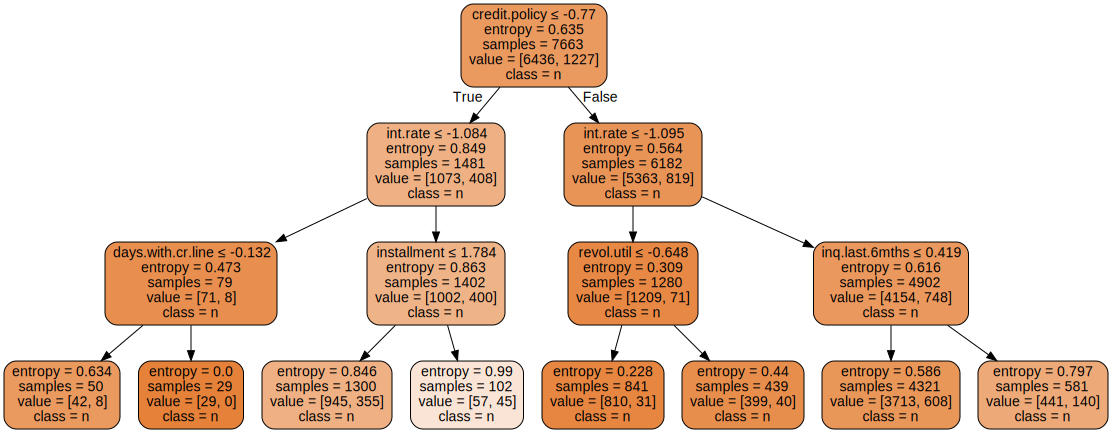

In [189]:
#Building the model with Stratified K FOld option and splits as 5
#Printing the accuracy with each split as well
Feature_list = ['credit.policy', 'int.rate', 'installment', 'log.annual.inc',
                               'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
                               'inq.last.6mths', 'delinq.2yrs', 'pub.rec',
                                'purpose_credit_card','purpose_debt_consolidation', 'purpose_educational',
                                'purpose_home_improvement', 'purpose_major_purchase',
                                'purpose_small_business']
#Calling library for Stratified K fold 
skf = StratifiedKFold(n_splits=5,random_state=None, shuffle=True)
idx = 1
#Generate train & test data with each split 
for train_index, test_index in skf.split(X, y):
    print ("Split Fold :", idx)
    print("TRAIN:", train_index, "TEST:", test_index) #Printing the index used for each split
    X_train, X_test = X.iloc[train_index], X.iloc[test_index] #Assigning new split to Train ans Test X data
    y_train, y_test = y.iloc[train_index], y.iloc[test_index] #Assigning new split to Train ans Test Y data
    
    
    clf = DecisionTreeClassifier(criterion='entropy',max_depth=3) # Create Decision Tree classifer object
    clf = clf.fit(X_train,y_train)    # Train Decision Tree Classifer
    y_pred = clf.predict(X_test) #Predict the response for test dataset
    
    print("Accuracy:",metrics.accuracy_score(y_test, y_pred)) #Print the Accuracy 
    print ("\n")
    idx = idx + 1  #Increase the counter for second split 
    

#Print the descision tree with clf model and last split for demonstration 
dot_data = tree.export_graphviz(clf, 
                      feature_names=Feature_list,  
                      class_names="not.fully.paid",  
                      filled=True, rounded=True,  
                      special_characters=True,
                       out_file=None,
                             )
graph = graphviz.Source(dot_data)
graph

# Evaluate Accuracy using Cross Validation along with ShuffleSplit

In [190]:
#import the required modules
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import ShuffleSplit

#Set the cross validation using shuffleSplit
cv = ShuffleSplit(n_splits=5, test_size=0.3, random_state=0)

#Get the cross validation score with CV and built model clf
scores = cross_val_score(clf, X, y, cv=cv)

#Print the scores
print("Cross Validation Scores with CV as {0}".format(cv))
print ("Scores: ", scores)

#Print the Accuracy
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Validation Scores with CV as ShuffleSplit(n_splits=5, random_state=0, test_size=0.3, train_size=None)
Scores:  [0.83716075 0.83542102 0.8375087  0.84377175 0.83368128]
Accuracy: 0.84 (+/- 0.01)
